In [1]:
import jax
from jax import numpy as np

## 6

In [2]:
seed3 = jax.random.PRNGKey(3)
rands = jax.random.uniform(seed3, shape=(10000, 300, 2), dtype=jax.numpy.float32)


/data/home/will/.conda/envs/will-gpu/lib/python3.8/site-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [3]:
@jax.jit
def wedding_sim(rand_n):
    responds = rand_n[:, :, 0] < 0.3
    return responds*(rand_n[:, :, 1] < .9) + jax.lax.abs(responds-1)*(rand_n[:, :, 1] < .5)

In [4]:
# %%timeit
sim = wedding_sim(rands)

### a)

In [5]:
(sim.sum(axis=1) > 200).mean()

DeviceArray(0.0396, dtype=float32)

### b)

In [6]:
sim.sum(axis=1).mean()

DeviceArray(186.0502, dtype=float32)

~150, because there are usually lots of kids and old people that dont eat as much

## 5

In [7]:
seed1 = jax.random.PRNGKey(1)
two_bids = jax.random.randint(seed1, minval=100000, maxval=150000, shape=(10000, 2), dtype=jax.numpy.int32)

In [8]:
@jax.jit
def did_we_win(rand_bid, my_bid):
    return (my_bid > rand_bid[:, 0])*(my_bid > rand_bid[:, 1])

#### a)

In [9]:
proportion = did_we_win(two_bids, my_bid=130000).mean()
proportion

DeviceArray(0.3527, dtype=float32)

In [10]:
interval_bounds = 1.96 * np.sqrt(proportion*(1-proportion) / 10000)

In [11]:
print(proportion+interval_bounds)
print(proportion-interval_bounds)

0.36206508
0.3433349


#### b)

In [12]:
my_bid_price = np.expand_dims(np.arange(130000-20000, 150000, step=100), axis=1)

In [13]:
@jax.jit
def did_we_win(rand_bid1, rand_bid2, my_bid):
    return (my_bid > rand_bid1)*(my_bid > rand_bid2)

@jax.jit
def sim_2d(rand_tensor_1, rand_tensor_2, my_bid):
    return jax.vmap(did_we_win, (0, 0, None), 0)(rand_tensor_1, rand_tensor_2, my_bid)

In [14]:
simulation_2d = sim_2d(two_bids[:, 0], two_bids[:, 1], my_bid_price).mean(axis=0)

In [15]:
my_bid_price[simulation_2d > .90].min()

DeviceArray(147500, dtype=int32)

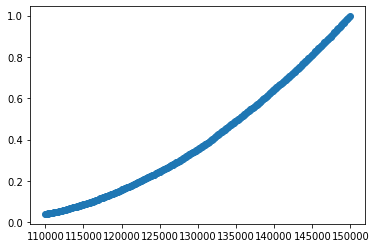

In [16]:
import matplotlib.pyplot as plt
plt.scatter(my_bid_price, simulation_2d)
plt.show()

#### c)

In [17]:
profit = (160000-my_bid_price)*simulation_2d

In [18]:
my_bid_price[np.argmax(profit)]

DeviceArray([140000], dtype=int32)

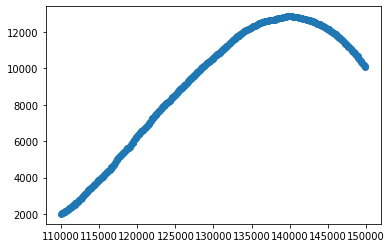

In [19]:
plt.scatter(my_bid_price, profit)
plt.show()